In [1]:
from google.colab import files
uploaded = files.upload()

Saving mtcars.csv to mtcars.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.dtypes

,0
model,object
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,int64


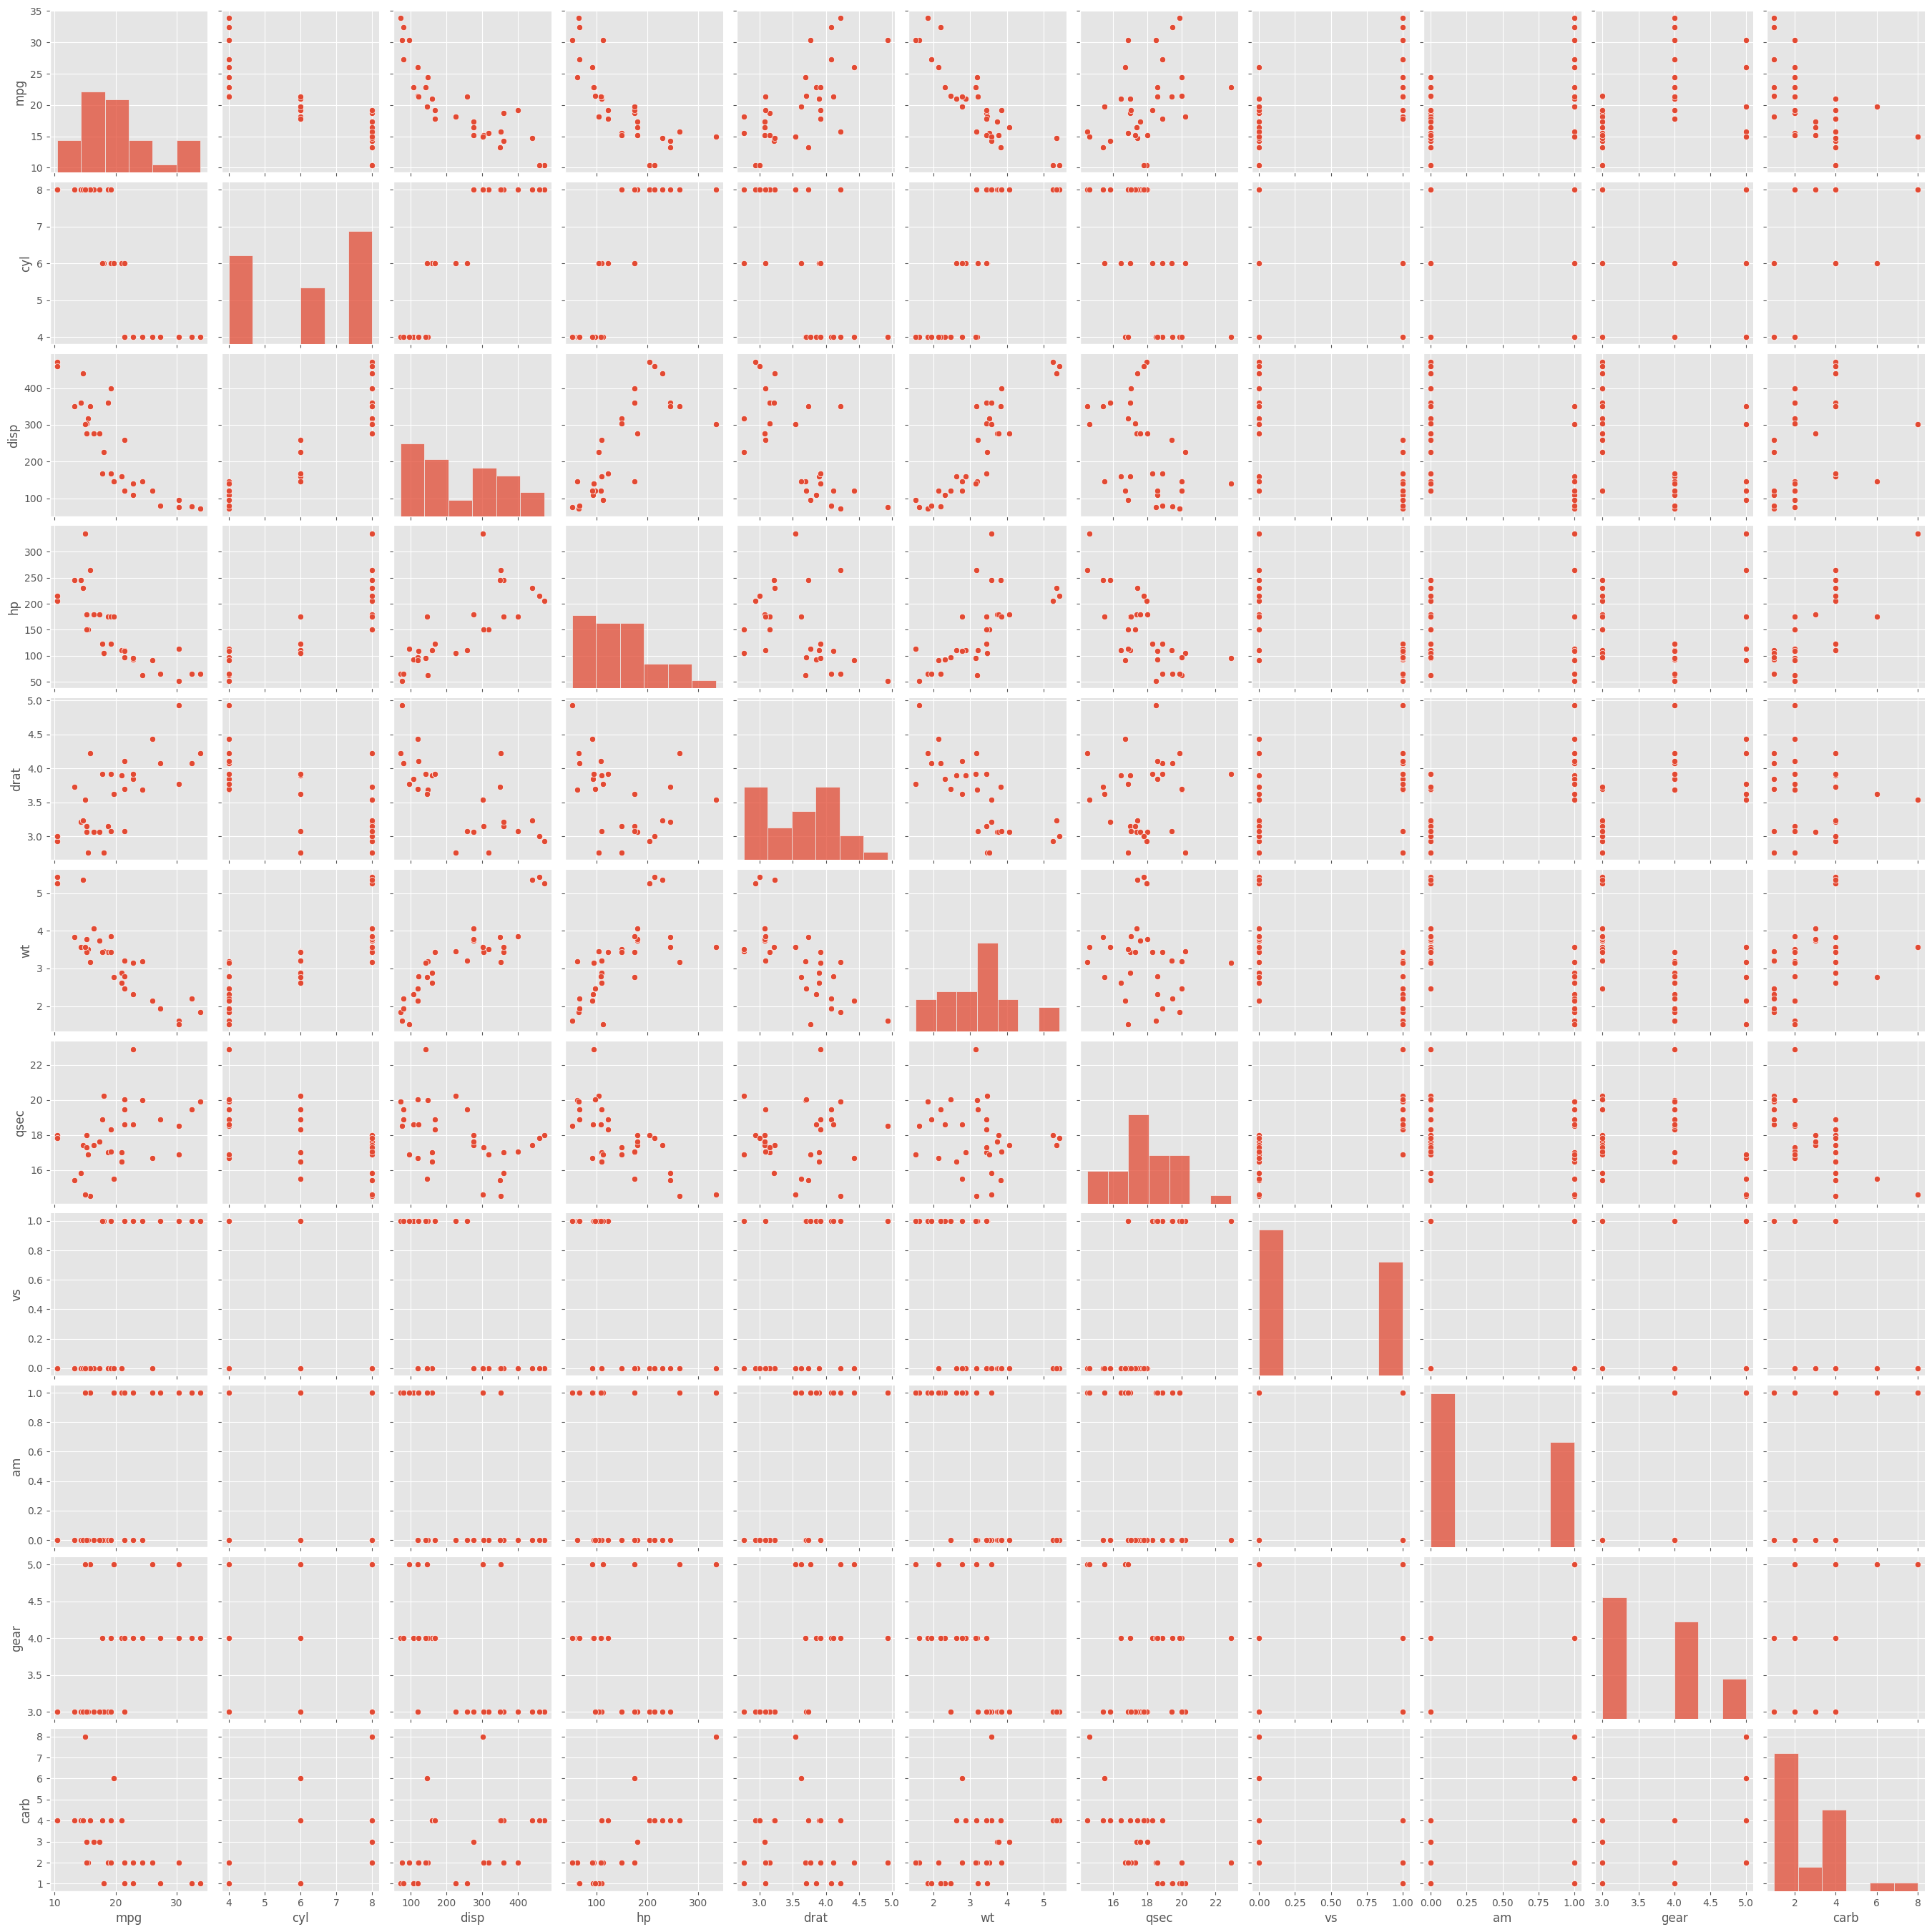

In [6]:
sns.pairplot(df)

In [7]:
df['mpg'].corr(df['wt'])

-0.8676593765172281

<Axes: xlabel='mpg', ylabel='wt'>

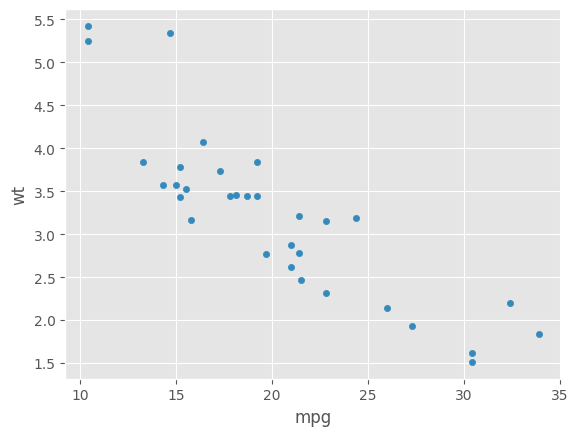

In [8]:
df.plot(kind='scatter', x='mpg', y='wt')

In [9]:
df[['mpg', 'wt']].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


In [10]:
# Model fitting
x = df['wt']
y = df['mpg']
x = sm.add_constant(x)
print(x)

    const     wt
0     1.0  2.620
1     1.0  2.875
2     1.0  2.320
3     1.0  3.215
4     1.0  3.440
5     1.0  3.460
6     1.0  3.570
7     1.0  3.190
8     1.0  3.150
9     1.0  3.440
10    1.0  3.440
11    1.0  4.070
12    1.0  3.730
13    1.0  3.780
14    1.0  5.250
15    1.0  5.424
16    1.0  5.345
17    1.0  2.200
18    1.0  1.615
19    1.0  1.835
20    1.0  2.465
21    1.0  3.520
22    1.0  3.435
23    1.0  3.840
24    1.0  3.845
25    1.0  1.935
26    1.0  2.140
27    1.0  1.513
28    1.0  3.170
29    1.0  2.770
30    1.0  3.570
31    1.0  2.780


In [11]:
y.shape, x.shape

((32,), (32, 2))

In [12]:
# Linear regression using statsmodel OLS: ordinary least square method
model_sm = sm.OLS(y, x).fit()
print(model_sm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.745   
Dependent Variable: mpg              AIC:                164.0294
Date:               2024-11-23 11:18 BIC:                166.9609
No. Observations:   32               Log-Likelihood:     -80.015 
Df Model:           1                F-statistic:        91.38   
Df Residuals:       30               Prob (F-statistic): 1.29e-10
R-squared:          0.753            Scale:              9.2774  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     37.2851     1.8776   19.8576   0.0000   33.4505   41.1198
wt        -5.3445     0.5591   -9.5590   0.0000   -6.4863   -4.2026
-----------------------------------------------------------------
Omnibus:              2.988        Durbin-Watson:           1.252
Prob(Omnibus):   

In [13]:
model_sm.rsquared

0.7528327936582646

In [14]:
# Fitting model using Scikit-learn
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(pd.DataFrame(df['wt']), y)

LinearRegression()

In [15]:
# Checking trained model y-intercept
print(regression_model.intercept_)

37.28512616734204


In [16]:
# Checking trained model coefficient
print(regression_model.coef_)

[-5.34447157]


In [17]:
# Checking r^2 value.
regression_model.score(pd.DataFrame(df['wt']), y)

0.7528327936582646

In [18]:
pred = regression_model.predict([[3.5],[4],[5],[5.5],[6]])
print(pred)

[18.57947566 15.90723988 10.5627683   7.89053252  5.21829673]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
train_prediction = regression_model.predict(pd.DataFrame(df['wt']))
print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [20]:
mtcars_wm = df[['wt','mpg']]
mtcars_wm['Predicted MPG'] = pd.DataFrame(train_prediction)
mtcars_wm.head()

<ipython-input-20-dae5e6127596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtcars_wm['Predicted MPG'] = pd.DataFrame(train_prediction)


,wt,mpg,Predicted MPG
0,2.620,21.0,23.282611
1,2.875,21.0,21.919770
2,2.320,22.8,24.885952
3,3.215,21.4,20.102650
4,3.440,18.7,18.900144


Text(0, 0.5, 'MPG')

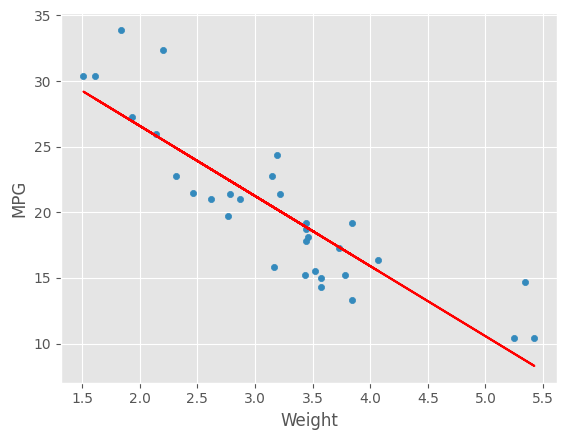

In [21]:
# plot the new model
df.plot(kind='scatter', x='wt', y='mpg')
plt.plot(df['wt'], train_prediction, color='red')
plt.xlabel('Weight')
plt.ylabel('MPG')

Text(0, 0.5, 'MPG')

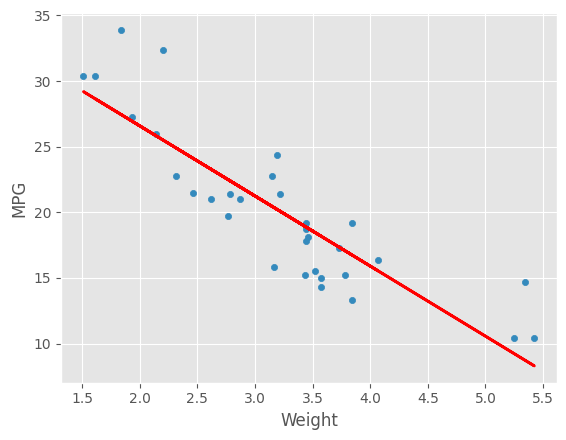

In [22]:
# plot the new model
df.plot(kind='scatter', x='wt', y='mpg')
plt.plot(df['wt'], train_prediction, color='red', linewidth=2)
plt.xlabel('Weight')
plt.ylabel('MPG')

In [24]:
error_sm = model_sm.resid
error_sm
print(sum(error_sm**2))

278.3219375433433


In [26]:
residuals = y - train_prediction
data = pd.DataFrame({'Residuals': residuals,
                     'Predicted MPG': train_prediction,
                     'error': error_sm,
                     'error2': residuals})
data

,Residuals,Predicted MPG,error,error2
0,-2.282611,23.282611,-2.282611,-2.282611
1,-0.919770,21.919770,-0.919770,-0.919770
2,-2.085952,24.885952,-2.085952,-2.085952
3,1.297350,20.102650,1.297350,1.297350
4,-0.200144,18.900144,-0.200144,-0.200144
5,-0.693255,18.793255,-0.693255,-0.693255
6,-3.905363,18.205363,-3.905363,-3.905363
7,4.163738,20.236262,4.163738,4.163738
8,2.349959,20.450041,2.349959,2.349959
9,0.299856,18.900144,0.299856,0.299856


<Axes: ylabel='Density'>

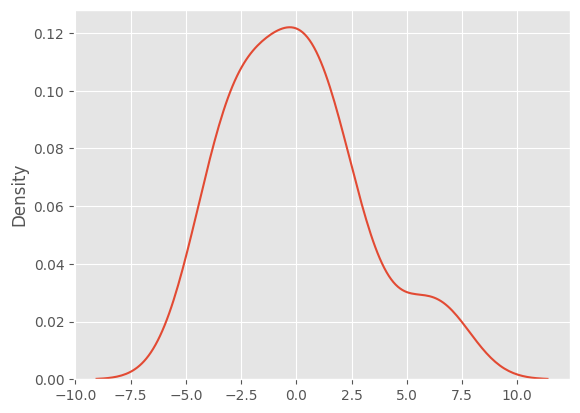

In [28]:
sns.kdeplot(error_sm)

<Axes: xlabel='mpg', ylabel='Density'>

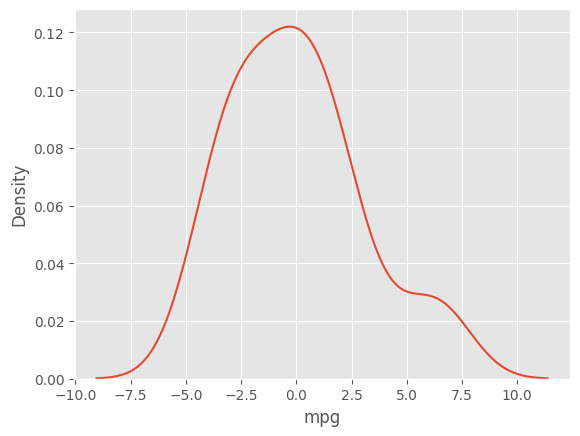

In [29]:
sns.kdeplot(residuals)

In [30]:
# Polynomial Regression Analysis

In [37]:
# Initialize model
from sklearn.linear_model import LinearRegression # LinearRegression has been imported in this line
poly_model = LinearRegression() # Use LinearRegression() directly to initialize
# Make a DataFrame of predictor variables
predictors_x = pd.DataFrame({'wt': df['wt'], 'wt_squared': df['wt']**2}) # Corrected DataFrame creation

# Train the model using the new_cars data
poly_model.fit(predictors_x, y)
# Check trained model y-intercept
print('Model intercept: ', poly_model.intercept_)
# Check trained model coefficients
print('Model coefficients: ', poly_model.coef_)
# Check R-squared
print('Model R-squared: ', poly_model.score(predictors_x, y))

Model intercept:  49.93081094945181
Model coefficients:  [-13.38033708   1.17108689]
Model R-squared:  0.8190613581384094


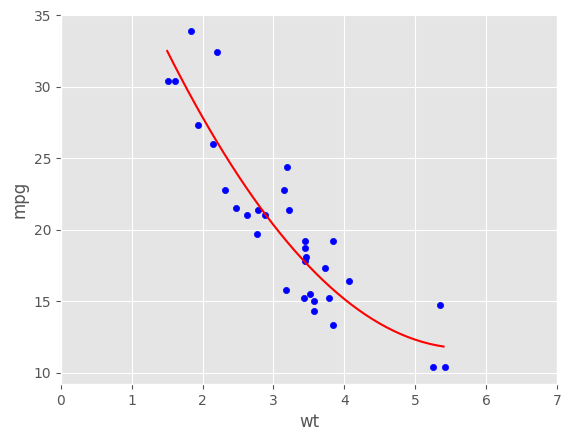

In [38]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)
poly_predictors = pd.DataFrame({'wt': poly_line_range,
                                'wt_squared': poly_line_range**2})

# print(poly_predictors)
# Get corresponding y values from the model
y_values = poly_model.predict(poly_predictors)
df.plot(kind='scatter', x='wt', y='mpg',color='blue',xlim=(0,7))
# Plot curve line
plt.plot(poly_line_range, y_values, color='red')

In [39]:
y_values

array([32.49525084, 31.52025406, 30.56867903, 29.64052574, 28.73579418,
       27.85448436, 26.99659628, 26.16212993, 25.35108533, 24.56346246,
       23.79926133, 23.05848193, 22.34112428, 21.64718836, 20.97667418,
       20.32958174, 19.70591104, 19.10566207, 18.52883485, 17.97542936,
       17.44544561, 16.93888359, 16.45574332, 15.99602478, 15.55972798,
       15.14685292, 14.75739959, 14.39136801, 14.04875816, 13.72957005,
       13.43380367, 13.16145904, 12.91253614, 12.68703498, 12.48495556,
       12.30629788, 12.15106193, 12.01924772, 11.91085525, 11.82588452])

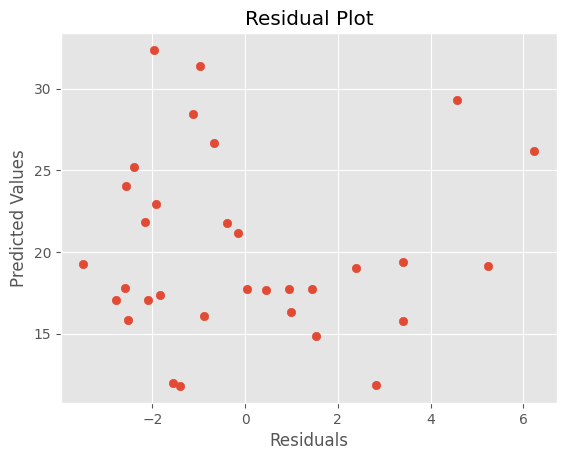

In [44]:
# Residual ploting
residuals_poly = y - poly_model.predict(predictors_x)
# print(sum(residuals_poly**2))

# the predicted values for the original data
predicted_y_original = poly_model.predict(predictors_x)

# Now plot residuals against predicted values for the original data
plt.scatter(residuals_poly, predicted_y_original)
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.title('Residual Plot')
plt.show()